In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Regulatory Affairs of Road Accident.csv')



In [2]:
print("\nColumns:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)


Columns:
['Million Plus Cities', 'Cause category', 'Cause Subcategory', 'Outcome of Incident', 'Count']

Data Types:
Million Plus Cities     object
Cause category          object
Cause Subcategory       object
Outcome of Incident     object
Count                  float64
dtype: object


In [3]:
# Inspect structure
df.info()


# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Handle missing values
df['count'] = pd.to_numeric(df['count'], errors='coerce').fillna(0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [4]:
df.head()

,million_plus_cities,cause_category,cause_subcategory,outcome_of_incident,count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [5]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
million_plus_cities    0
cause_category         0
cause_subcategory      0
outcome_of_incident    0
count                  0
dtype: int64


In [6]:
# Compute median
median_count = df['count'].median()

# Fill missing values in 'count' with median
df['count'] = df['count'].fillna(median_count)

print(f"Filled missing 'count' values with median: {median_count}")
print(df.isnull().sum())

Filled missing 'count' values with median: 12.0
million_plus_cities    0
cause_category         0
cause_subcategory      0
outcome_of_incident    0
count                  0
dtype: int64


In [7]:

#convert object columns to category
object_cols = ['million_plus_cities', 'cause_category', 'cause_subcategory', 'outcome_of_incident']
for col in object_cols:
    df[col] = df[col].astype('category')

print(df.dtypes)

million_plus_cities    category
cause_category         category
cause_subcategory      category
outcome_of_incident    category
count                   float64
dtype: object


In [8]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
             count
count  9550.000000
mean    103.595079
std     275.152200
min       0.000000
25%       0.000000
50%      12.000000
75%      70.000000
max    3148.000000


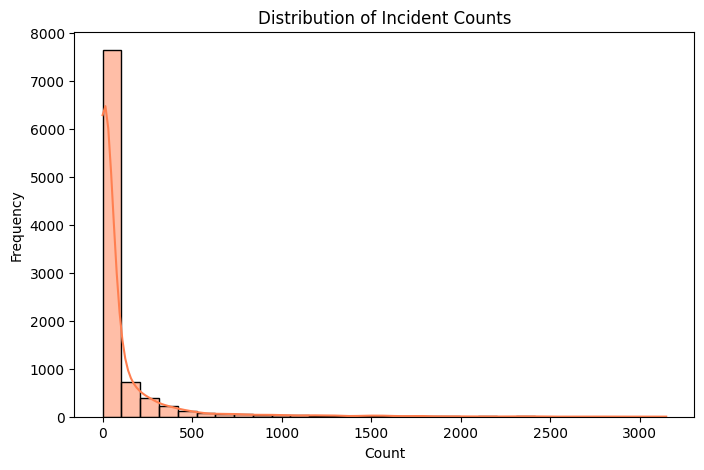

In [9]:
#EDA - Univariate analysis
plt.figure(figsize=(8, 5))
sns.histplot(df['count'], bins=30, kde=True, color='coral')
plt.title('Distribution of Incident Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12084\3931783307.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, y='million_plus_cities', x='count', palette='viridis')


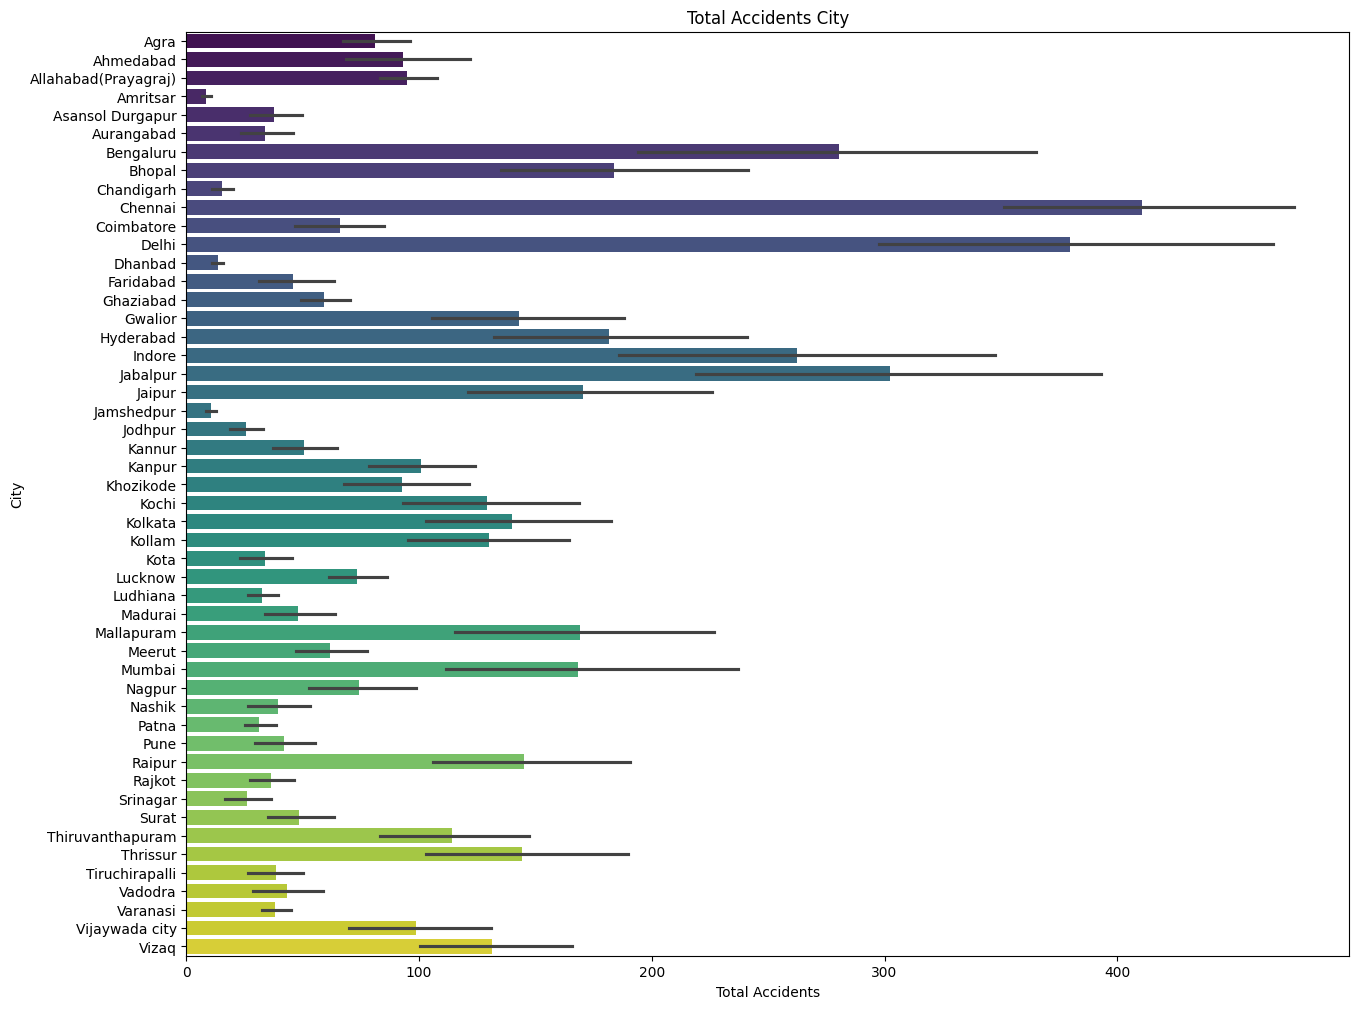

In [10]:
#Accidents per City
plt.figure(figsize=(15,12))
top_cities = df.sort_values('count', ascending=False)
sns.barplot(data=top_cities, y='million_plus_cities', x='count', palette='viridis')
plt.title('Total Accidents City')
plt.xlabel('Total Accidents')
plt.ylabel('City')
plt.show()

In [11]:
#Chennai,Delhi and Jabalpur are top 3 cities with highest accidents
#Dhanbad,Jamshedpur and Amritsar are cities with least accidents

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12084\652112139.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_counts = df.groupby('million_plus_cities')['count'].sum().sort_values(ascending=False)


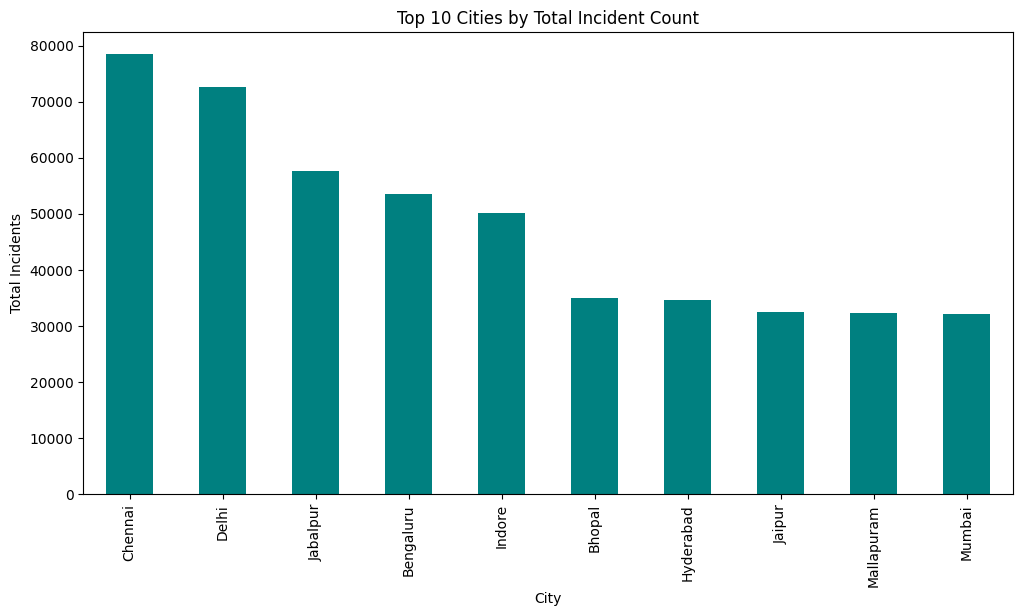

In [12]:
#Top 10 Cities by Incident Count


city_counts = df.groupby('million_plus_cities')['count'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
city_counts.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Cities by Total Incident Count')
plt.ylabel('Total Incidents')
plt.xlabel('City')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12084\52792531.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_counts = df.groupby('million_plus_cities')['count'].sum().sort_values(ascending=True)


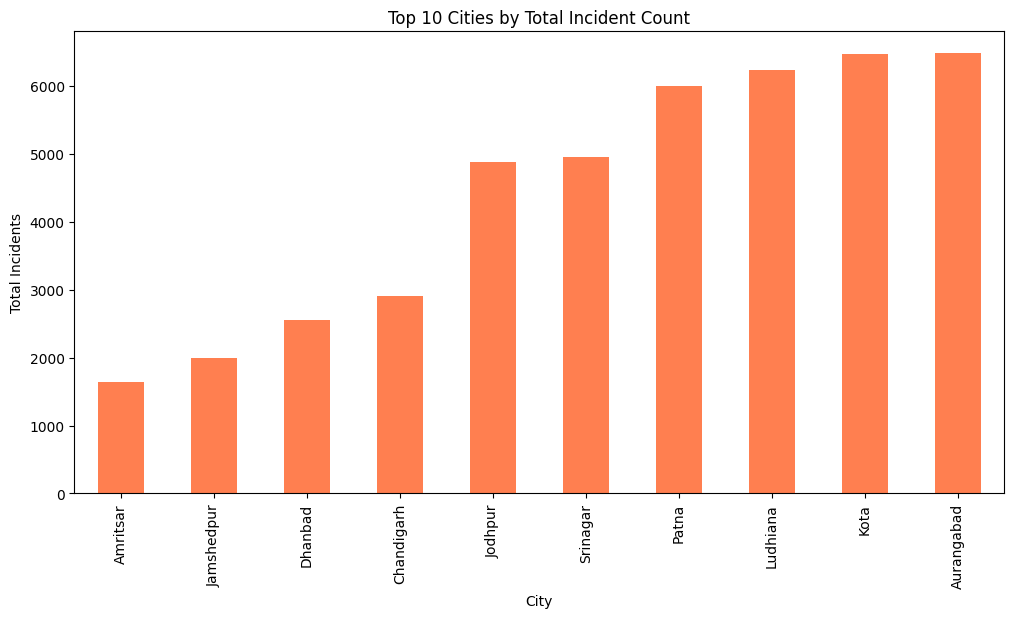

In [13]:
#Top 10 Cities by Incident Count

city_counts = df.groupby('million_plus_cities')['count'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
city_counts.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Cities by Total Incident Count')
plt.ylabel('Total Incidents')
plt.xlabel('City')
plt.show()

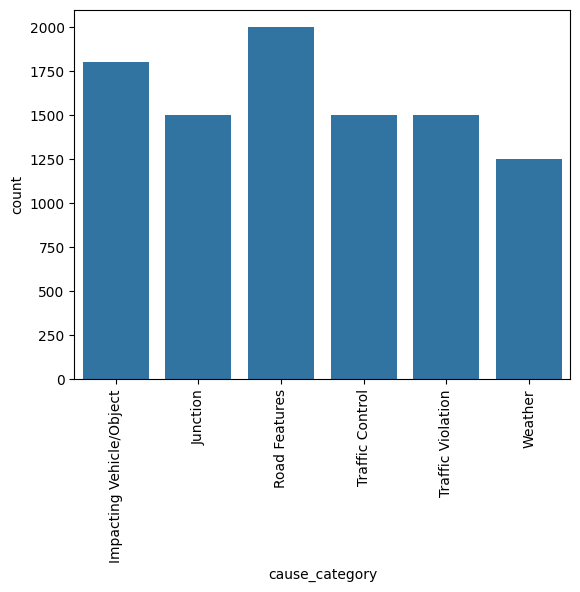

In [14]:
#Incident Count by Cause Category

sns.countplot(data=df,x="cause_category")
plt.xticks(rotation=90)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12084\580123793.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cause_subcategory_counts = df.groupby('cause_subcategory')['count'].sum().sort_values(ascending=False)


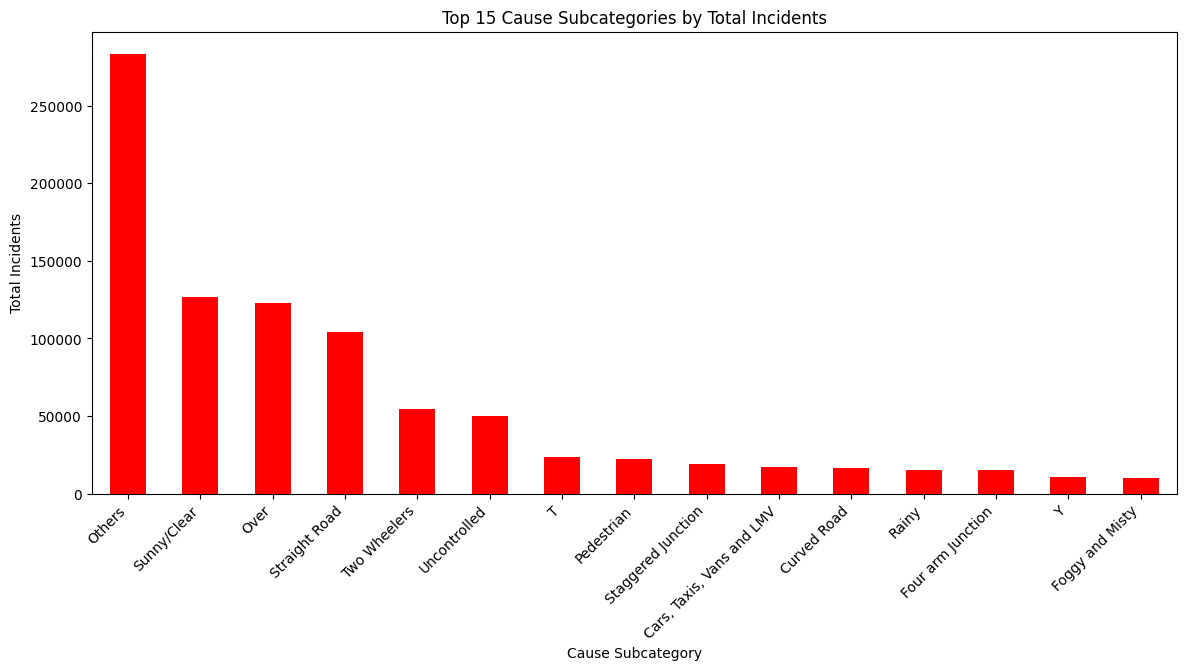

In [15]:
#Incident Count by Cause Subcategory


cause_subcategory_counts = df.groupby('cause_subcategory')['count'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
cause_subcategory_counts.head(15).plot(kind='bar', color='red')
plt.title('Top 15 Cause Subcategories by Total Incidents')
plt.ylabel('Total Incidents')
plt.xlabel('Cause Subcategory')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12084\4175619969.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outcome_counts = df.groupby('outcome_of_incident')['count'].sum().sort_values(ascending=False)


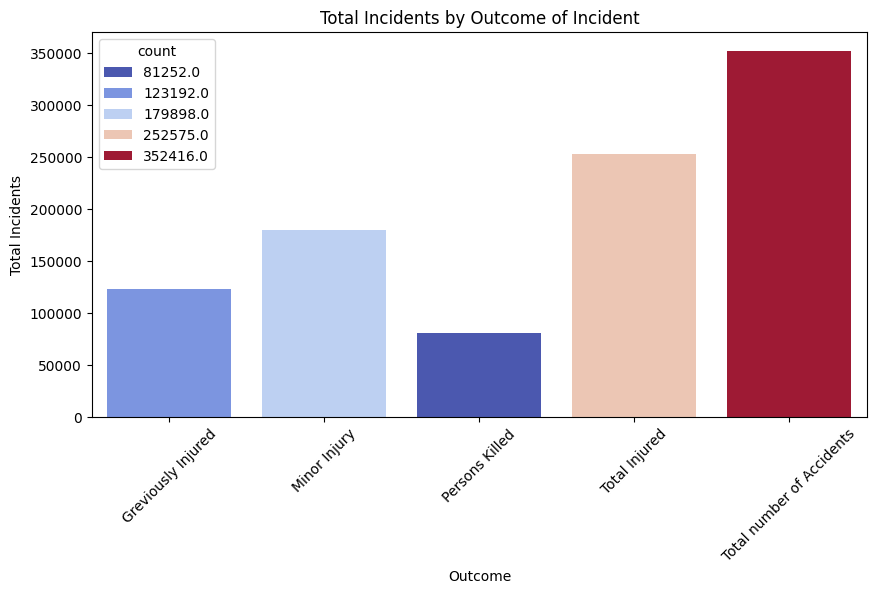

In [16]:
#Outcome of Incident Analysis


outcome_counts = df.groupby('outcome_of_incident')['count'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values,hue= outcome_counts, palette='coolwarm')
plt.title('Total Incidents by Outcome of Incident')
plt.ylabel('Total Incidents')
plt.xlabel('Outcome')
plt.xticks(rotation=45)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12084\2337653827.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='count',index='cause_category',


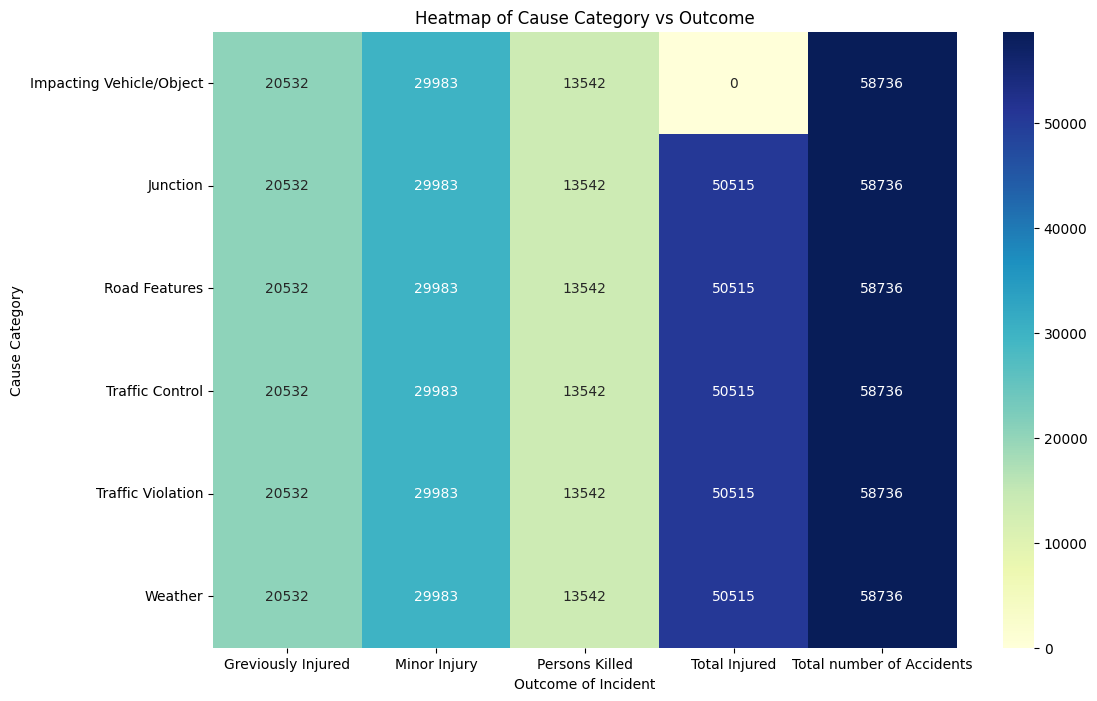

In [17]:
#Heatmap of Causes vs Outcomes

pivot_table = df.pivot_table(values='count',index='cause_category',
                             columns='outcome_of_incident',
                             aggfunc='sum',
                             fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap of Cause Category vs Outcome')
plt.ylabel('Cause Category')
plt.xlabel('Outcome of Incident')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12084\953637851.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  city_cause_pivot = df.pivot_table(values='count',


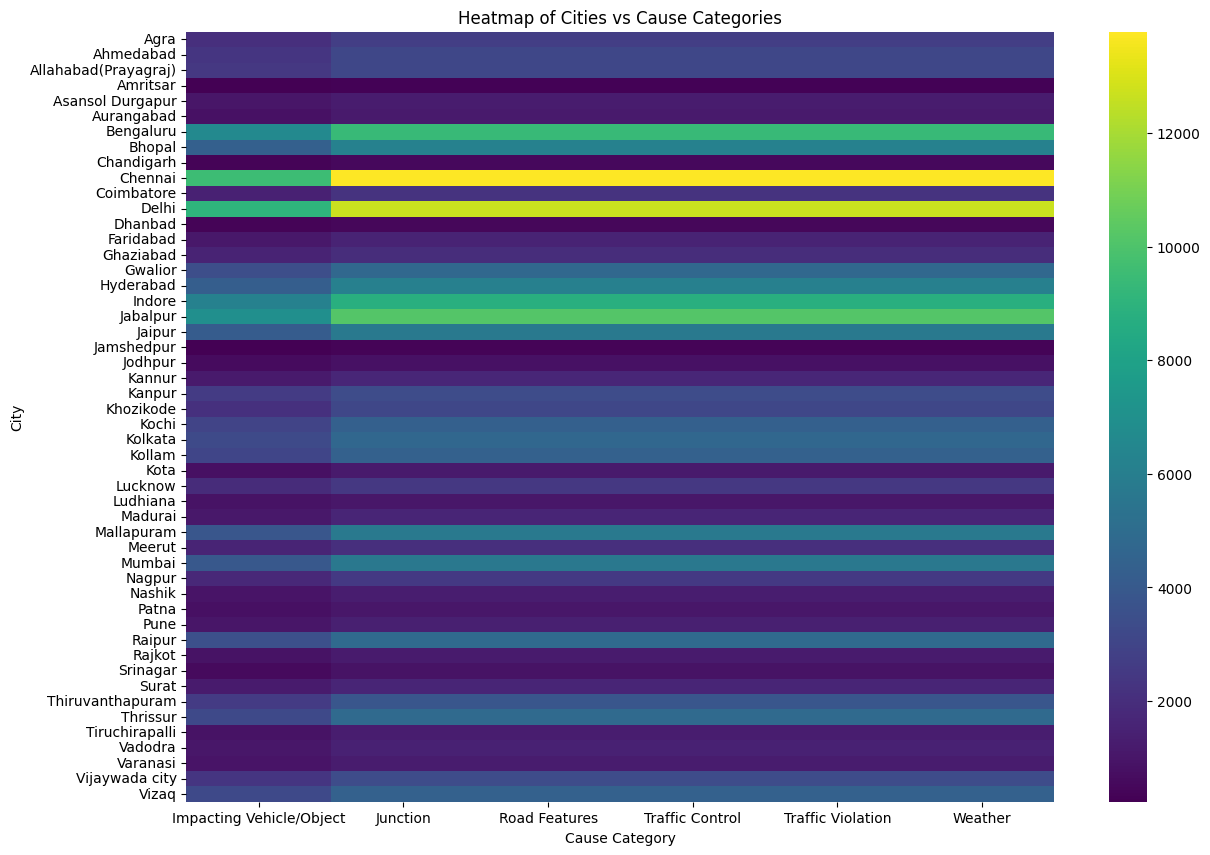

In [18]:
#Heatmap of Cities vs Cause Categories

city_cause_pivot = df.pivot_table(values='count',
                                  index='million_plus_cities',
                                  columns='cause_category',
                                  aggfunc='sum',
                                  fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(city_cause_pivot, cmap='viridis')
plt.title('Heatmap of Cities vs Cause Categories')
plt.ylabel('City')
plt.xlabel('Cause Category')
plt.show()

In [19]:
#The top 10 cities account for X% of all incidents

total_incidents = df['count'].sum()
print(f"Total incidents in all cities: {total_incidents}")

Total incidents in all cities: 989333.0


In [20]:
# Group by city, sum incidents

city_totals = df.groupby('million_plus_cities')['count'].sum().sort_values(ascending=False)
print(city_totals)

million_plus_cities
Chennai                 78459.0
Delhi                   72526.0
Jabalpur                57715.0
Bengaluru               53535.0
Indore                  50098.0
Bhopal                  35069.0
Hyderabad               34720.0
Jaipur                  32524.0
Mallapuram              32294.0
Mumbai                  32106.0
Raipur                  27722.0
Thrissur                27540.0
Gwalior                 27309.0
Kolkata                 26715.0
Vizaq                   25122.0
Kollam                  24821.0
Kochi                   24694.0
Thiruvanthapuram        21825.0
Kanpur                  19280.0
Vijaywada city          18823.0
Allahabad(Prayagraj)    18066.0
Ahmedabad               17796.0
Khozikode               17696.0
Agra                    15483.0
Nagpur                  14170.0
Lucknow                 14014.0
Coimbatore              12574.0
Meerut                  11801.0
Ghaziabad               11319.0
Kannur                   9669.0
Surat               

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12084\3949777612.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_totals = df.groupby('million_plus_cities')['count'].sum().sort_values(ascending=False)


In [21]:
#Total incidents in top 10 cities
top10_total = city_totals.head(10).sum()

In [22]:

#Compute % share of top 10 cities
top10_share_pct = (top10_total / total_incidents) * 100
print(f"Top 10 cities account for {top10_share_pct:.2f}% of all incidents.")

Top 10 cities account for 48.42% of all incidents.


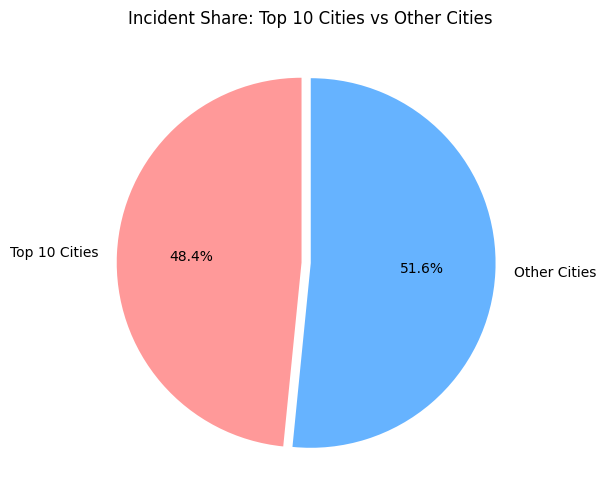

In [23]:


# Values
top10_share = top10_total
rest_share = total_incidents - top10_total

# Labels and sizes
labels = ['Top 10 Cities', 'Other Cities']
sizes = [top10_share, rest_share]
colors = ['#ff9999','#66b3ff']

# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0))
plt.title('Incident Share: Top 10 Cities vs Other Cities')
plt.show()

In [ ]:
#Total accidents by city
SELECT million_plus_cities, SUM(count) AS total_accidents
FROM road_accidents
GROUP BY million_plus_cities
ORDER BY total_accidents DESC;

#Most common subcategories
SELECT cause_subcategory, SUM(count) AS total
FROM road_accidents
GROUP BY cause_subcategory
ORDER BY total DESC;

#Outcome distribution
SELECT outcome_of_incident, SUM(count) AS total
FROM road_accidents
GROUP BY outcome_of_incident;


In [ ]:
#Conclusion
#The analysis reveals that the top 10 million-plus cities together account for approximately 48.42% of all reported incidents in the dataset.

#This striking concentration indicates that nearly half of all road incidents occur in just 10 major urban centers,highlighting the need for targeted urban safety interventions.

#Among these, Chennai, Delhi, and Jabalpur stand out as the cities with the highest number of accidents,while Dhanbad, Jamshedpur, and Amritsar recorded the lowest.

#The data also shows that certain cause categories road features and Impacting vehicle/object—dominate as primary factors behind incidents.


#Analysis of outcomes reveals that most incidents result in injuries, underscoring a significant burden on public health systems.

#Heatmap visualizations further highlight distinct city-specific patterns in incident causes,offering valuable guidance for urban planners and policymakers aiming to design targeted, localized safety strategies